In [1]:
import pymania as mn

In [2]:
a = mn.create_project('Constantine','vdense',True)

In [3]:
a.backend.connect()

In [4]:
for roi in ['R'+str(xx) for xx in range(1,181)]:
    a.add_roi(roi)
for roi in ['L'+str(xx) for xx in range(1,181)]:
    a.add_roi(roi)

In [5]:
a.add_subject(180533)

In [6]:
a.load()
print('loaded...')

loading subject 0 180533
loaded...


In [7]:
len(a(180533))

64800

In [26]:
sorted(['R','L'])

['L', 'R']

In [23]:
with open('test.pkl','wb') as f:
    pk.dump(a,f)

In [10]:
a.run()

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


MANIA1 on subject 0 <pymania.primitives.EnsembleST object at 0x116bde908>
MANIA2 on subject 0 <pymania.primitives.EnsembleST object at 0x116bde908>


KeyError: 146735

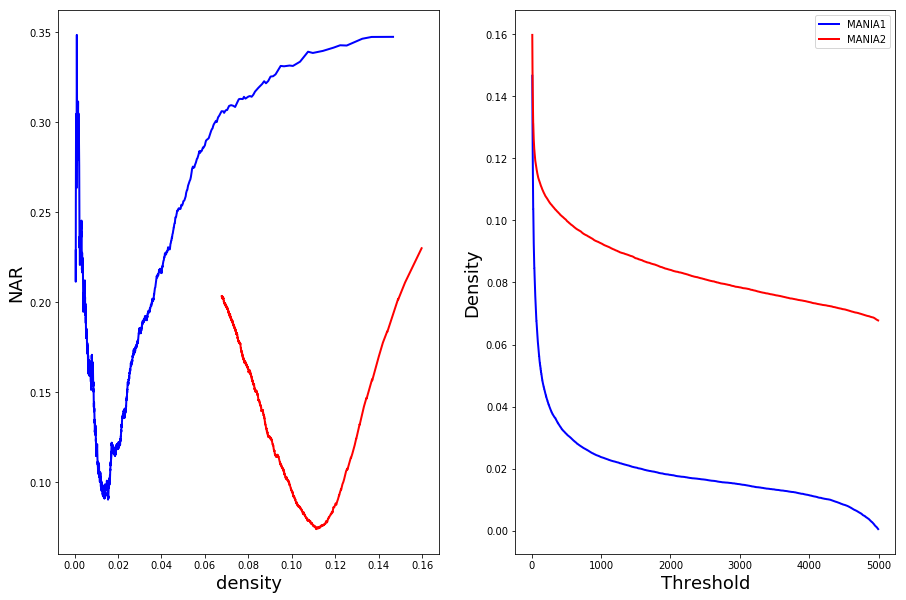

In [11]:
a(180533).plot_mania()

5000.0

In [21]:
import numpy as np

In [10]:
a(146735).threshold1

2169

In [7]:
a.find_envelope_points()
a.find_local_regressors()

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [8]:
a.find_corrected_weights()

In [29]:
from importlib import reload
mn = reload(mn)

In [11]:
a.subjects[146735]('L1','L22')._mania_loaded = True
a.subjects[146735]('L1','L22')._threshold2 = a(146735).threshold2

In [15]:
import numpy as np

Text(0.5,1,'L1 to L22')

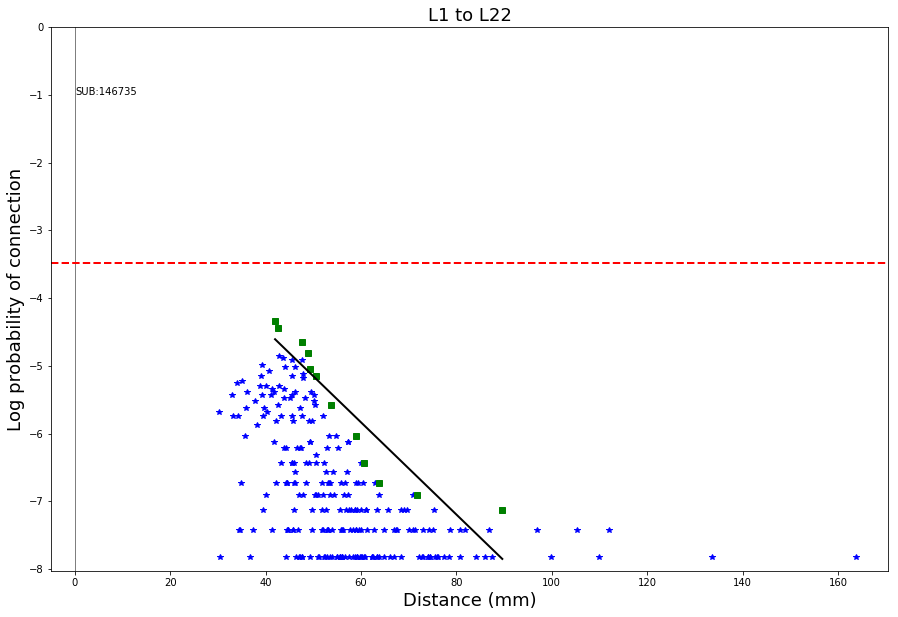

In [23]:
ax = a.subjects[146735]('L1','L22').plot()
ax.set_facecolor((255/255,255/255,255/255))
ax.axhline(np.log(a(146735).threshold2/5000),color='red',lw=2,ls='dashed')
ax.set_ylabel('Log probability of connection',fontsize=18)
ax.set_title('L1 to L22',fontsize=18)

In [25]:
ax

NameError: name 'ax' is not defined

In [5]:
from inspect import isclass, isabstract, getmembers

In [10]:
getmembers(mn.solvers,lambda x:isclass(x))

[('ABC', abc.ABC),
 ('EnsembleST', pymania.primitives.EnsembleST),
 ('Graph', py2neo.database.Graph),
 ('LinearRegression', sklearn.linear_model.base.LinearRegression),
 ('MANIA2Error', pymania.primitives.MANIA2Error),
 ('MRP_F', pymania.solvers.mrp_symm_force.MRP_F),
 ('MRP_NF', pymania.solvers.mrp_symm_noforce.MRP_NF),
 ('Node', py2neo.types.Node),
 ('NoiseError', pymania.utils.noise.NoiseError),
 ('PairST', pymania.primitives.PairST),
 ('RegressionError', pymania.utils.regression.RegressionError),
 ('Regressor', pymania.utils.regression.Regressor),
 ('Relationship', py2neo.types.Relationship),
 ('ST', pymania.primitives.ST),
 ('Solver', pymania.solvers.base.Solver),
 ('backend', pymania.io.neo_tools.backend),
 ('tqdm', tqdm._tqdm.tqdm)]

In [4]:
mn.F.svs

{}

In [7]:
B = A()

In [9]:
type(B).name

AttributeError: type object 'A' has no attribute 'name'

In [10]:
def f():
    pass

In [14]:
f.order = 3

In [15]:
f.order

3

In [24]:
a = np.array([[1,20],[3,2],[11,-2]])
b = np.array([[8,54],[19,-3]])
c = np.vstack((a,b))
ind = np.ones((5,1))
ind[3:,0] = 2
d = np.hstack((c,ind))
d

array([[ 1., 20.,  1.],
       [ 3.,  2.,  1.],
       [11., -2.,  1.],
       [ 8., 54.,  2.],
       [19., -3.,  2.]])

In [29]:
d = sorted(d,key=lambda x:x[0])


AttributeError: 'list' object has no attribute 'reshape'

In [57]:
l=12
ind = np.ones((l,1))
ind[4:,0] = -1
ind = np.sort(ind,axis=0)
ind

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [3]:
import numpy as np

In [62]:
a[[0,2]]

array([[ 1, 20],
       [11, -2]])

In [42]:
from sklearn.linear_model import LinearRegression
x = [1,2,3,5]
y = [1,2,3,4]
w = sorted(zip(x,y))
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
reg = LinearRegression().fit(x, y)
intercept = reg.intercept_[0]
slope = reg.coef_[0][0]
l = len(x)

In [45]:
mx = np.mean([xx[0] for xx in w])
nom = 0
denom = 0
for x,y in w:
    yh = (slope*x)+intercept
    nom += (y-yh)**2
    denom += (x-mx)**2
se = np.sqrt(nom/(l-2))/np.sqrt(denom)
print(slope,se)

0.7428571428571429 0.09897433186107871


In [50]:
from scipy import stats
#Studnt, n=999, p<0.05, 2-tail
#equivalent to Excel TINV(0.05,999)
print(stats.t.ppf(1 - 0.05/2, 9))

2.2621571627409915
